In [1]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

BASE_URL = 'http://127.0.0.1:8000/api/'
next_url = BASE_URL + 'matches'

In [2]:
results = [0, 0, 0]
N = len(results)

In [3]:
while next_url is not None:
    response = requests.get(next_url)
    data = json.loads(response.text)
    
    for match in data['results']:
        if match['full_time_result'] == 'H':
            results[0] += 1
        elif match['full_time_result'] == 'D':
            results[1] += 1
        else:
            results[2] += 1
    
    next_url = data['next']

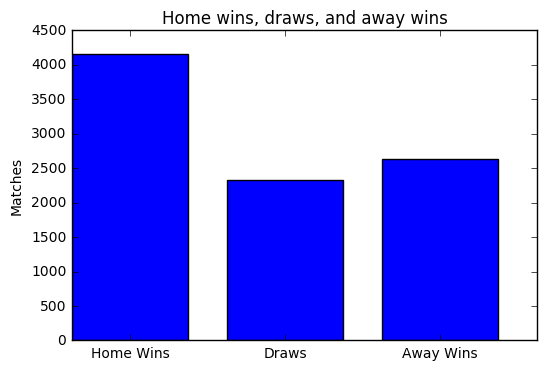

In [5]:
ind = np.arange(N)
width = 0.75
fig, axes = plt.subplots()
bars = axes.bar(ind, results, width)

axes.set_title('Home wins, draws, and away wins')
axes.set_ylabel('Matches')
axes.set_xticks(ind + width / 2)
axes.set_xticklabels(('Home Wins', 'Draws', 'Away Wins'))

plt.show()